<a href="https://colab.research.google.com/github/JOteng15/OGTIP-Projects/blob/main/OGTIP_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [143]:
data = pd.read_csv("/content/HRDataset_v14.csv")
df = data.copy()

In [144]:
df["Position"].unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [145]:
df.shape

(311, 35)

In [146]:
df["Sex"] = df["Sex"].str.strip().replace({"M":"Male","F":"Female"})

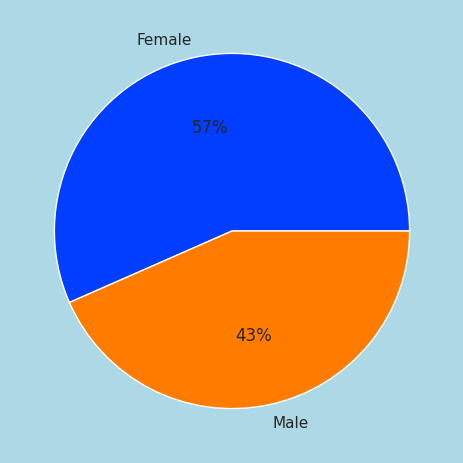

In [147]:
h = pd.DataFrame(df["Sex"].value_counts()).reset_index()
palette_color = sns.color_palette('bright')
plt.pie(h["Sex"], labels=h["index"], colors=palette_color,autopct='%.0f%%')
plt.tight_layout()

In [148]:
r = df.loc[:,["PerfScoreID","Salary","EngagementSurvey","EmpSatisfaction","SpecialProjectsCount","Absences","DaysLateLast30"]]

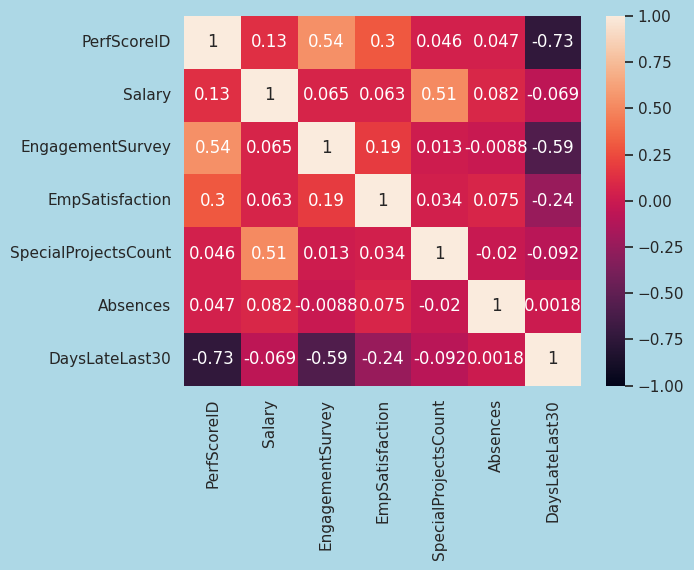

In [149]:
sns.heatmap(r.corr(),vmin = -1,vmax = 1,annot = True);


In [150]:
df2 = df.loc[:,["MaritalDesc","EmpSatisfaction"]].groupby("MaritalDesc").sum()
df2 = df2.reset_index()
df2 = df2.rename(columns = {"EmpSatisfaction":"Mean EmpSatisfaction"})
df2

,MaritalDesc,Mean EmpSatisfaction
0,Divorced,121
1,Married,465
2,Separated,46
3,Single,544
4,Widowed,34


In [151]:
df2["Mean EmpSatisfaction"] =df2["Mean EmpSatisfaction"].apply(lambda a:a/ df[df["MaritalDesc"] == df2["MaritalDesc"][df2["Mean EmpSatisfaction"].tolist().index(a)]].shape[0])

In [152]:
df3 = df.loc[:,["EmpSatisfaction","Salary","GenderID"]]
df3["GenderID"] = df3["GenderID"].apply(lambda x: "Male" if x == 1 else "Female")

<Figure size 1200x500 with 0 Axes>

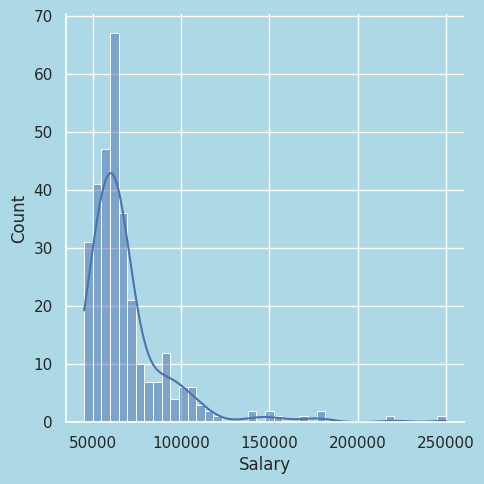

In [153]:
fig = plt.figure(figsize=(12,5))
sns.displot(df["Salary"],kde = True,)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})

In [154]:
df["Salary"].describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [155]:
df["TermReason"] = [1 if i == "N/A-StillEmployed" else 0 for i in df["TermReason"].tolist()]

Text(0.5, 1.0, 'Those who stay')

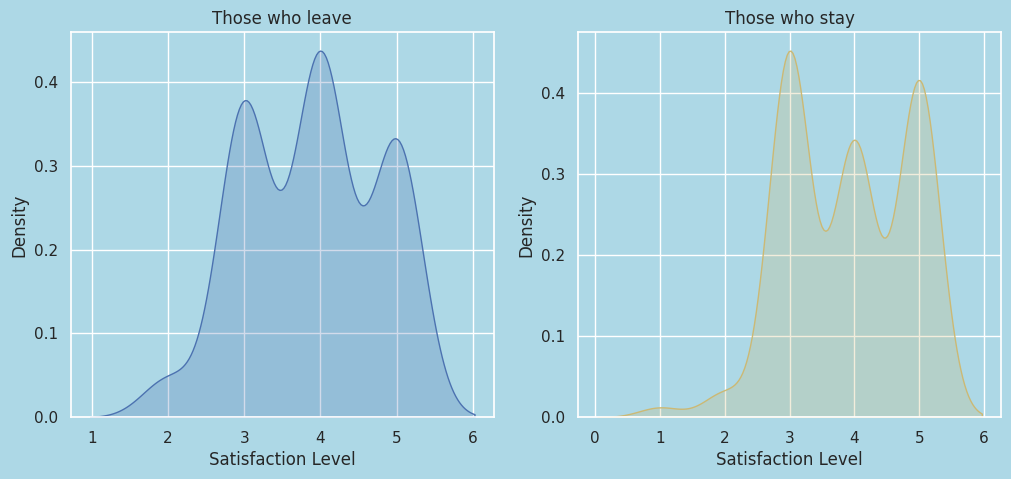

In [156]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
left_job=df[df["TermReason"]==0]
stayed_job=df[df["TermReason"]==1]
sns.kdeplot(left_job["EmpSatisfaction"],fill = True,color="b",ax=ax[0],legend=False)
ax[0].set_xlabel("Satisfaction Level")
ax[0].set_ylabel("Density")
ax[0].set_title("Those who leave")
sns.kdeplot(stayed_job["EmpSatisfaction"],fill=True,color="y",ax=ax[1],legend=False)
ax[1].set_xlabel("Satisfaction Level")
ax[1].set_ylabel('Density')
ax[1].set_title('Those who stay')


It seems that those who leave have a higher satisfication level.

<Axes: xlabel='Salary', ylabel='Department'>

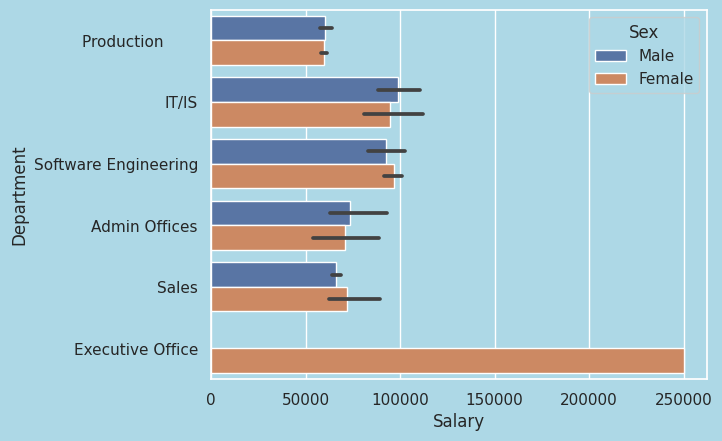

In [157]:
sns.barplot(df,y ="Department",x ="Salary",hue = "Sex")


<Axes: xlabel='count', ylabel='Department'>

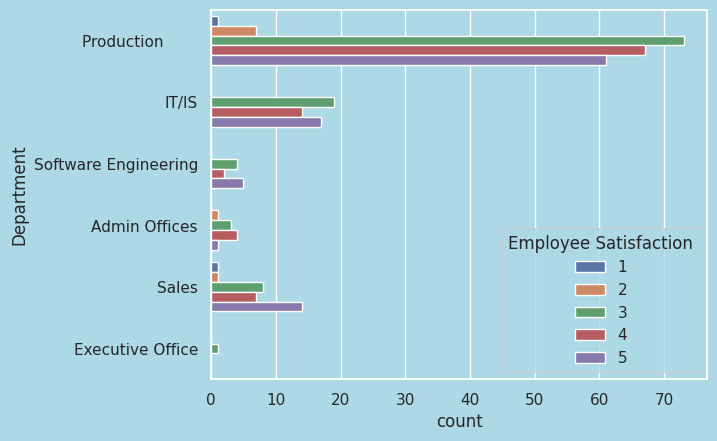

In [158]:
df_22= df.copy()
df_22 = df_22.rename(columns  = {"EmpSatisfaction":"Employee Satisfaction"})

sns.countplot(df_22,y = "Department",hue  = "Employee Satisfaction",orient = "y")


In [159]:
%matplotlib inline
plt.figure(figsize = (20,6))
px.bar(df,x = "RecruitmentSource",color = "PerfScoreID",labels = {"RecruitmentSource":"Recruitment Source"})



<Figure size 2000x600 with 0 Axes>

From the graph it is evident that LinkedIn and Indeed are both the main sources of recruiment for employees.

Text(0.5, 0, 'Performance Score')

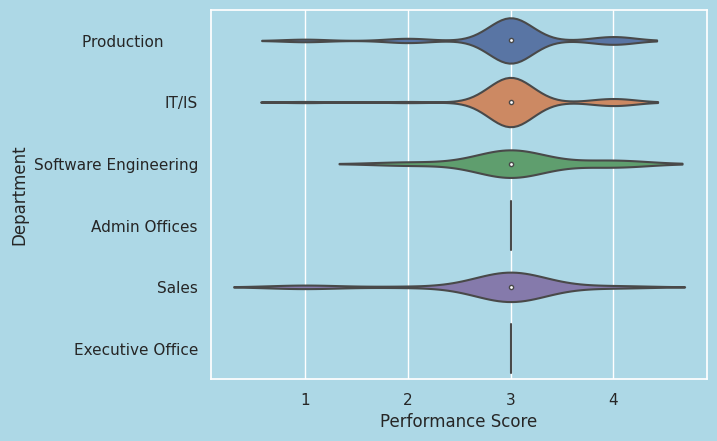

In [160]:
sns.violinplot(data = df,y = "Department", x = "PerfScoreID")
plt.ylabel('Department')

plt.xlabel('Performance Score')

In [161]:
new_df = data[~data["TermReason"].isin(["N/A-StillEmployed"])]["TermReason"]


In [162]:
new_df = pd.DataFrame(new_df.value_counts()).reset_index()
new_df = new_df.rename(columns = {"index":"Reasons","TermReason":"count"})

In [163]:
new_df

,Reasons,count
0,Another position,20
1,unhappy,14
2,more money,11
3,career change,9
4,hours,8
5,attendance,7
6,return to school,5
7,relocation out of area,5
8,"no-call, no-show",4
9,military,4


In [164]:
colors = sns.color_palette('pastel')[0:5]

#create pie chart
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=new_df["Reasons"], values=new_df["count"],hole = 0.3)])

fig.show()

<Axes: xlabel='Sex', ylabel='Salary'>

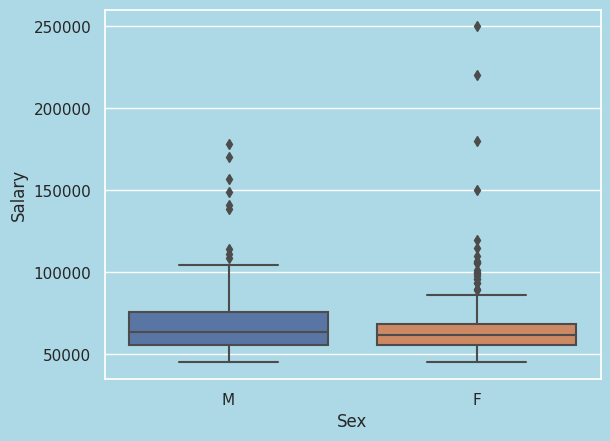

In [165]:

data["Sex"] = data["Sex"].str.strip()
g = data.loc[:,["Salary","Sex"]]

sns.boxplot(data= g,x = "Sex",y = "Salary")


In [166]:
k = data.loc[:,["PerformanceScore","Department"]]
px.bar(k,x = "Department",color = "PerformanceScore")

In [167]:
l = data.groupby(["Department","DaysLateLast30"]).size().reset_index()

In [168]:
colours =['lightcyan','cyan','royalblue','darkblue',"purple","pink"]

fig = go.Figure(data=[go.Pie(labels=l["Department"], values=l[0],pull=[0, 0, 0.2, 0])])
fig.update_traces(marker=dict(colors=colours))

fig.show()